In [4]:
# Importamos todo lo necesario
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

In [4]:
# pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
df = pd.read_csv('insurance.csv')
df.head()
#Nuestro target será la prima del seguro (charges)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#Exploramos un poco el dataframe
df.info()
#numéricas tenemos age, bmi, children i charges

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# Cuántos valores únicos tenemos de cada columna??
df.nunique()
#sex i smoker podemos convertirla en variables binarias

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [9]:
#Estadísticos
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
#Hay duplicados? (todas las columnas iguales)
df.duplicated().sum()

1

In [12]:
#Eliminamos duplicados
df.drop_duplicates(inplace=True)

In [14]:
#Volvemos a comprobar: hay duplicados? (todas las columnas iguales)
df.duplicated().sum()

0

# Preprocesado

In [27]:
#Preproceasado
#Numéricas: age, bmi, children >> son normales?

from scipy import stats
from scipy.stats import shapiro

# H0: la variables es normal
# H1: La variable no es normal

# si p-value > 0.05 se acepta la hipotesis nula HO


In [28]:
stats, p= stats.shapiro(df.age)
print(stats, p)
# devuelve la "fuerza" del descarte o aceptación  y el p-value

0.9448564052581787 6.211415541934325e-22


In [24]:
# El 0.9448 es la fuerza del descarte o aceptación de la hipótesis nula. En el caso de age, se decarta la H0 
# (el p-value) es muchísmo menor que 0.05 (fijemos que es un número e-22)y la fuerza el descarte es 0.99

In [33]:
#hay que hacer este import aquí (no entendemos porqué no funciona solo con el anterior)
from scipy.stats import shapiro

normal = []
no_normal = []
for name in ['age', 'bmi','children']:
    stats, p=shapiro(df[name])
    if p > 0.05:
        print(name, "es normal", stats, p)
        normal.append(name)
    else:
         print(name, "no es normal", stats, p)
         no_normal.append(name)
print("Normales:", normal)
print("No Normales", no_normal)

age no es normal 0.9448564052581787 6.211415541934325e-22
bmi no es normal 0.9938761591911316 2.5783332603168674e-05
children no es normal 0.8233991861343384 5.4062968267062164e-36
Normales: []
No Normales ['age', 'bmi', 'children']


<Axes: >

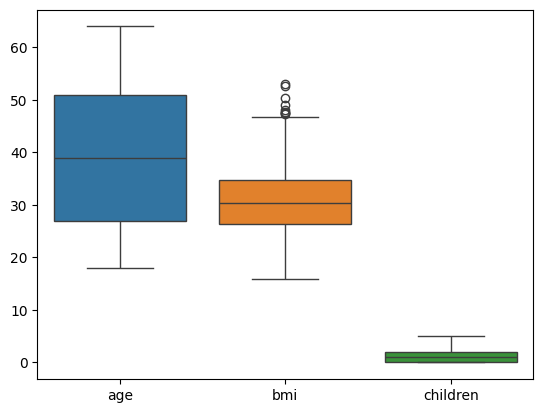

In [34]:
# Ninguna es nomral
# Si hubiera alguna Normal aplicamos StandardScaler() >> no es nuestro caso
# Aplicamos normalización a las No Normales
# Primero, chequear outliers con los boxplots
sns.boxplot(data=df[no_normal])


In [39]:
# bmi tiene outliers >> aplicamos RobustScaler
# Sin outlier >> aplicamos MinMaxScaler
# Hacemos copia del dataset original dt_t : dataset transformado
df_t = df.copy()

In [36]:
# Importamos
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [37]:
rs = RobustScaler()
mms = MinMaxScaler()

In [44]:
df_t [['bmi']] = rs.fit_transform(df_t[['bmi']])
df_t

,age,sex,bmi,children,smoker,region,charges
0,19,female,-0.297265,0,yes,southwest,16884.92400
1,18,male,0.400713,1,no,southeast,1725.55230
2,28,male,0.309156,3,no,southeast,4449.46200
3,33,male,-0.914982,0,no,northwest,21984.47061
4,32,male,-0.180737,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,0.067776,3,no,northwest,10600.54830
1334,18,female,0.180737,0,no,northeast,2205.98080
1335,18,female,0.766944,0,no,southeast,1629.83350
1336,21,female,-0.546968,0,no,southwest,2007.94500


In [46]:
df_t [['age']] = mms.fit_transform(df_t[['age']])
df_t

,age,sex,bmi,children,smoker,region,charges
0,0.021739,female,-0.297265,0,yes,southwest,16884.92400
1,0.000000,male,0.400713,1,no,southeast,1725.55230
2,0.217391,male,0.309156,3,no,southeast,4449.46200
3,0.326087,male,-0.914982,0,no,northwest,21984.47061
4,0.304348,male,-0.180737,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,0.695652,male,0.067776,3,no,northwest,10600.54830
1334,0.000000,female,0.180737,0,no,northeast,2205.98080
1335,0.000000,female,0.766944,0,no,southeast,1629.83350
1336,0.065217,female,-0.546968,0,no,southwest,2007.94500


In [47]:
df_t [['children']] = mms.fit_transform(df_t[['children']])
df_t

,age,sex,bmi,children,smoker,region,charges
0,0.021739,female,-0.297265,0.0,yes,southwest,16884.92400
1,0.000000,male,0.400713,0.2,no,southeast,1725.55230
2,0.217391,male,0.309156,0.6,no,southeast,4449.46200
3,0.326087,male,-0.914982,0.0,no,northwest,21984.47061
4,0.304348,male,-0.180737,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,0.695652,male,0.067776,0.6,no,northwest,10600.54830
1334,0.000000,female,0.180737,0.0,no,northeast,2205.98080
1335,0.000000,female,0.766944,0.0,no,southeast,1629.83350
1336,0.065217,female,-0.546968,0.0,no,southwest,2007.94500
